In [1]:
# Install XGBoost if not installed (uncomment if needed)
# !pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import joblib


# **Load Dataset**

In [2]:
from sklearn.datasets import fetch_covtype

# Load covertype dataset
data = fetch_covtype()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Cover_Type")

# Combine into one DataFrame (optional view)
df = pd.concat([X, y], axis=1)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


# **Data Exploration & Cleaning**


In [3]:
# Info about dataset
df.info()

# Quick statistics
df.describe().T.head(10)

# Check for missing values
print("Missing values:", df.isnull().sum().sum())

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

# **Preprocessing**

In [4]:
# Separate features and target
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target labels
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (464809, 54) Test shape: (116203, 54)


# **Random Forest Classifier**

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.953245613280208
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



# **XGBoost Classifier**

In [6]:
xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8696074972246843
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



# **Confusion Matrices**

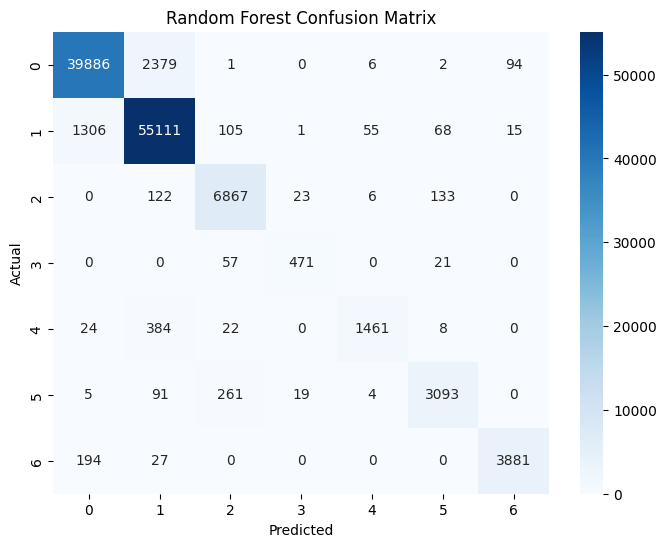

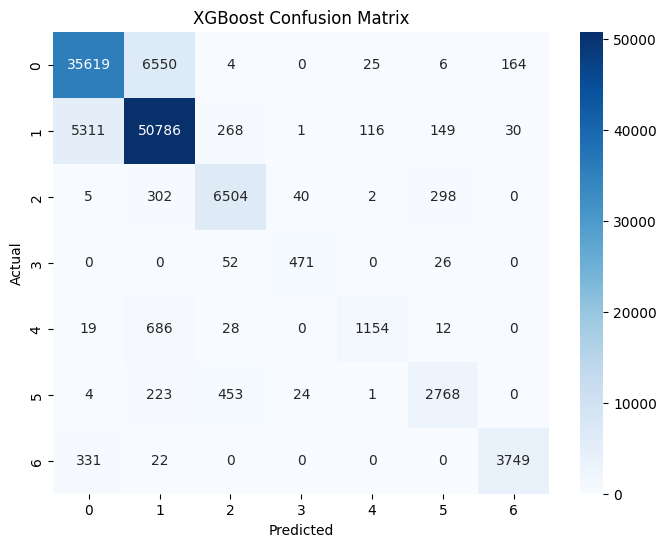

In [7]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")


# **Feature Importance**

/tmp/ipython-input-2141760412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importances.head(10), x="Importance", y="Feature", palette="viridis")


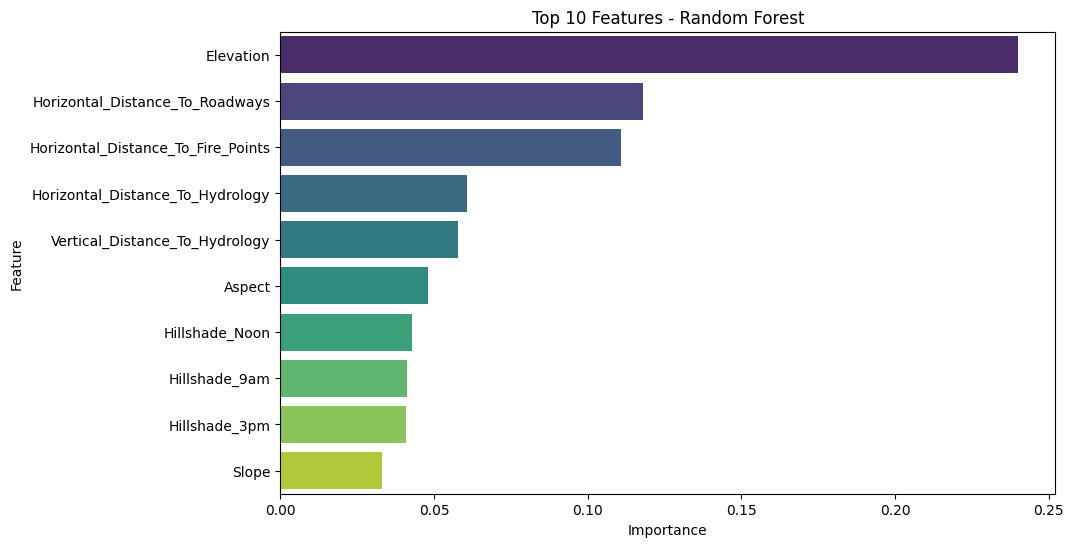

/tmp/ipython-input-2141760412.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importances.head(10), x="Importance", y="Feature", palette="plasma")


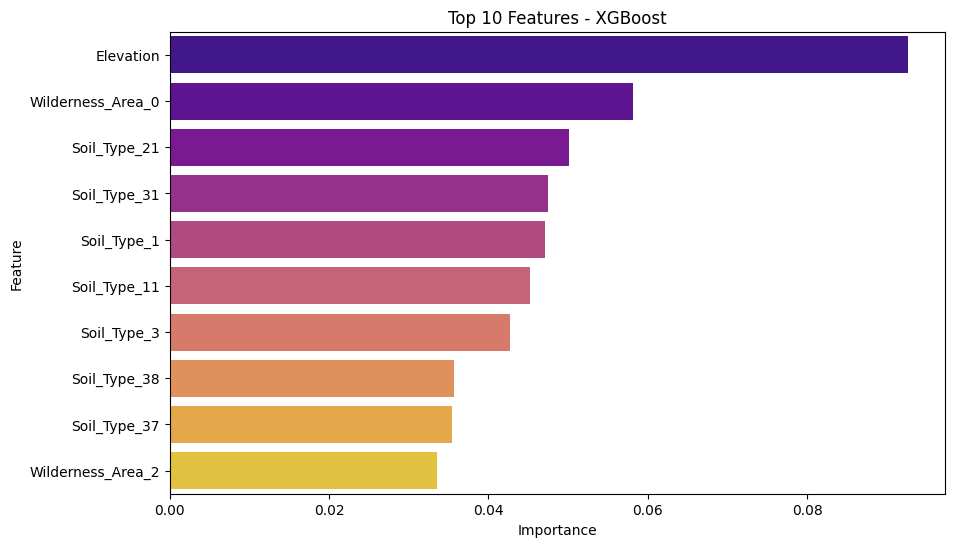

In [8]:
# Random Forest top features
rf_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=rf_importances.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Features - Random Forest")
plt.show()

# XGBoost top features
xgb_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=xgb_importances.head(10), x="Importance", y="Feature", palette="plasma")
plt.title("Top 10 Features - XGBoost")
plt.show()


# **Hyperparameter Tuning (Random Forest Example)**

In [9]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5, cv=3, n_jobs=1, random_state=42, verbose=2
)

search.fit(X_train, y_train)

best_rf = search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best RF Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Parameters:", search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.3min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 3.8min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 3.2min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 3.1min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.6min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.5min
[CV] END max_depth=

# **Logistic Regression (Baseline)**

In [10]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7234408750204384


# **Model Comparison**

                 Model  Accuracy
0  Logistic Regression  0.723441
1        Random Forest  0.953246
2              XGBoost  0.869607


/tmp/ipython-input-199298813.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Set2")


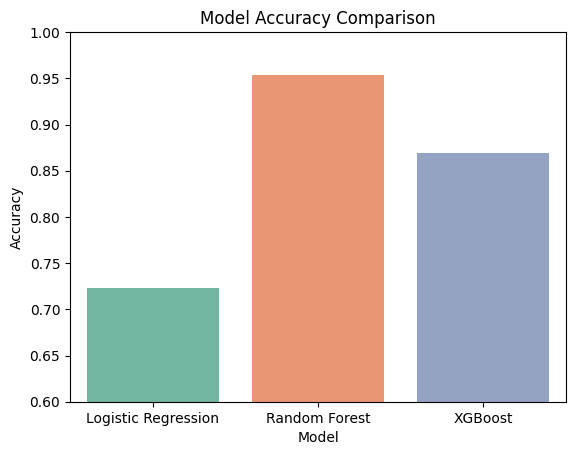

In [11]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)

sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylim(0.6, 1.0)
plt.show()


# **Save Models**

In [12]:
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Models and scaler saved successfully!")


Models and scaler saved successfully!
